In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
fcpo_daily_badjusted=pd.read_hdf('data/processed_dta.h5','fcpo_daily_badjusted')
fcpo_daily_nadjusted=pd.read_hdf('data/processed_dta.h5','fcpo_daily_nadjusted')

In [3]:
fcpo_close_nadjusted=fcpo_daily_nadjusted['2011-01-01':'2018-10-01']['Close'].reset_index()
fcpo_close_nadjusted=fcpo_close_nadjusted.rename(columns={'Date':'ds','Close':'y'})

In [4]:
nadjusted_prophet=Prophet(daily_seasonality=False)

In [5]:
#nadjusted_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
nadjusted_prophet.fit(fcpo_close_nadjusted)

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
future_dates=nadjusted_prophet.make_future_dataframe(15,freq='B')
nadjusted_forecast=nadjusted_prophet.predict(future_dates)

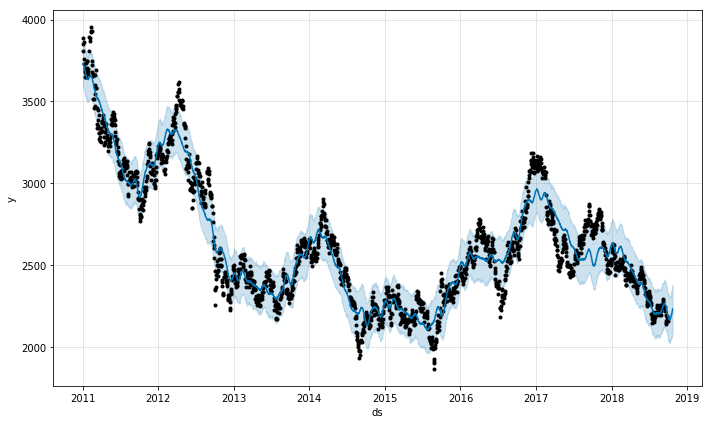

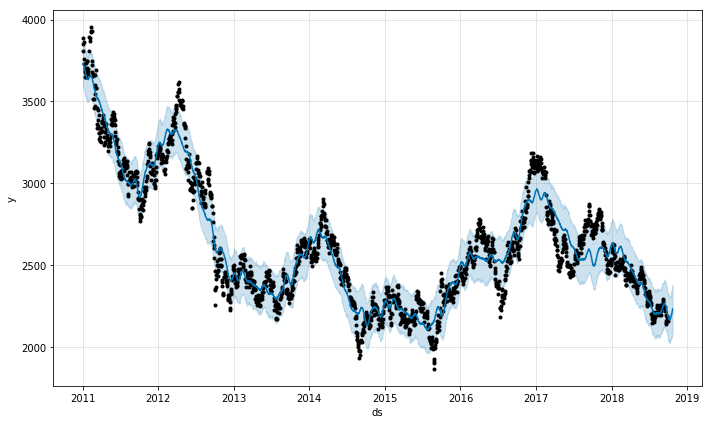

In [7]:
nadjusted_prophet.plot(nadjusted_forecast)

In [8]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [19]:
nadjusted_cv=cross_validation(nadjusted_prophet,initial='1100 days',period='30 days',horizon='60 days')

INFO:fbprophet.diagnostics:Making 56 forecasts with cutoffs between 2014-01-25 00:00:00 and 2018-08-02 00:00:00
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


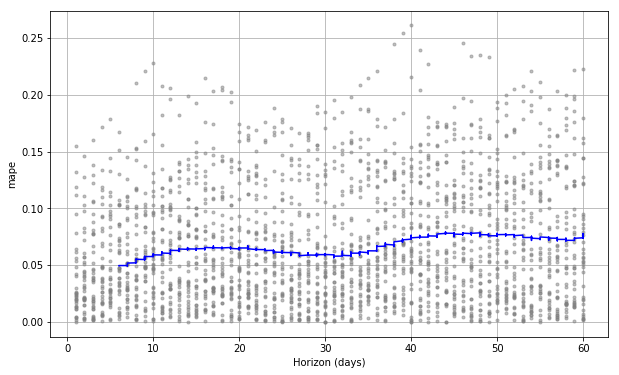

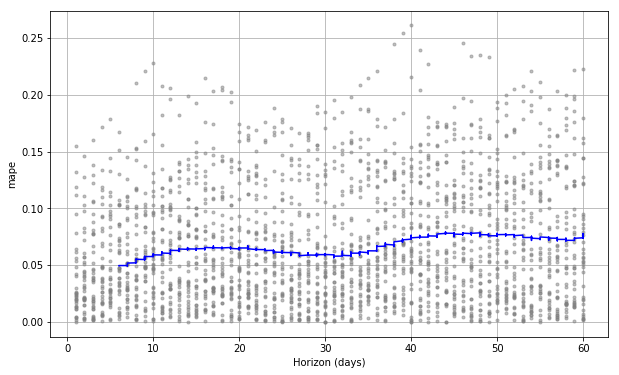

In [20]:
plot_cross_validation_metric(nadjusted_cv,metric='mape')

In [21]:
nadjusted_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-27,2690.510331,2582.525591,2795.959483,2556,2014-01-25
1,2014-01-28,2700.639658,2590.449216,2810.245121,2532,2014-01-25
2,2014-01-29,2718.580568,2608.528839,2826.555150,2542,2014-01-25
3,2014-01-30,2726.089712,2623.172528,2837.175690,2563,2014-01-25
4,2014-02-04,2789.218676,2677.422363,2889.703736,2528,2014-01-25


In [22]:
nadjusted_cv[nadjusted_cv['ds']=='2015-01-13']

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
443,2015-01-13,2191.240457,2062.730285,2304.376670,2354,2014-11-21
463,2015-01-13,2165.656204,2056.618021,2284.149079,2354,2014-12-21
